## Dependencies 

In [3]:
import pandas as pd
import keras
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt

## Data Cleansing

* Create mfcc and genre table from the `features.csv` and `tracks.csv` data


In [4]:
metadata = pd.read_csv('features.csv')

In [5]:
tracks = pd.read_csv('tracks.csv', header=1)
tracks = tracks.rename(columns={"Unnamed: 0": "track_id"})
tracks = tracks.drop([0])

In [6]:
tracks = tracks.dropna(subset=["genre_top"])

In [7]:
metadata = metadata.drop([0,1,2]).rename(columns={"feature":"track_id"})

In [8]:
def get_merged_df(m,t):
    allmfccs = ["track_id"]
    mfccdict = {"track_id":"int32"}
    for i in range(1,140):
        x = "mfcc."+str(i)
        allmfccs.append(x)
        mfccdict[x] = "float"
    tcolumns = ["track_id","genre_top"]
    tracks = t.astype({"track_id":"int32"})
    meta = m.astype(mfccdict)
    tracks = tracks[tcolumns] #data frame with track_ids and genres
    meta = meta[allmfccs] # data frame with mfcc and track_ids
    merged_df = pd.merge(meta,tracks,on="track_id")
    return merged_df

In [9]:
track_mfcc_df = get_merged_df(metadata,tracks)
track_mfcc_df

,track_id,mfcc.1,mfcc.2,mfcc.3,mfcc.4,mfcc.5,mfcc.6,mfcc.7,mfcc.8,mfcc.9,...,mfcc.131,mfcc.132,mfcc.133,mfcc.134,mfcc.135,mfcc.136,mfcc.137,mfcc.138,mfcc.139,genre_top
0,2,1.541901,0.000816,0.330728,0.118731,-0.342687,-0.259252,0.146735,0.410656,-0.162872,...,8.601942,9.284250,9.245516,8.520863,8.560472,7.651871,7.246555,7.077188,7.391859,Hip-Hop
1,3,1.399977,0.112535,-0.211170,0.032953,-0.023489,0.150404,0.046454,0.033484,-0.064596,...,10.026867,6.978541,7.650417,9.600357,7.222888,8.398293,7.285423,7.417791,8.777440,Hip-Hop
2,5,2.415293,0.440233,-0.782131,-0.771069,-0.724216,0.090260,0.152119,0.261731,-0.608905,...,9.581952,8.895723,8.141456,8.201844,7.780963,7.132692,7.539753,8.452527,7.334442,Hip-Hop
3,10,1.161854,2.095651,1.372743,-0.203574,-0.345354,-0.529139,0.561974,0.281350,-0.150672,...,7.985110,7.075400,6.972649,7.071393,7.270959,7.051070,6.928591,6.430473,6.186294,Pop
4,134,0.840775,-0.171289,-0.265671,-0.279361,0.190866,-0.192000,0.422766,0.044087,-0.003510,...,9.696905,8.477474,7.413949,7.518894,6.755280,6.344675,6.761541,7.134986,6.803034,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49593,155315,0.511910,2.573727,-0.444272,0.689142,-0.445705,0.122356,-0.051783,0.124393,1.357606,...,8.129650,7.889639,6.893649,6.792994,7.019863,6.894421,8.094346,6.055836,6.355721,Rock
49594,155316,5.361988,3.186483,0.510951,-0.143080,0.342237,0.771449,-0.184232,0.143237,0.009016,...,6.629143,5.860062,6.230947,5.923375,5.586200,5.516872,5.755764,5.105072,5.019556,Rock
49595,155317,1.752112,0.442188,-0.380960,-0.739809,-0.023362,0.264786,0.072084,0.295485,0.535544,...,6.955739,6.662989,6.478699,6.019901,5.757353,5.280114,5.674062,5.541949,5.266131,Rock
49596,155318,-0.129386,0.662489,1.025676,0.170532,1.827692,-0.189439,1.141878,0.022045,0.175235,...,6.943147,6.522048,6.780707,6.311563,5.789986,5.466107,5.607614,5.685448,5.449005,Rock


## Encode the labels and Creating X and Y data

In [10]:
genre_list = track_mfcc_df.iloc[:,-1]
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(genre_list).reshape(-1,1)).toarray()

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(track_mfcc_df.iloc[:,1:-1], dtype = float))

## Create Testing and Training Sets 

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [13]:
X_new = X_train
Y_new = Y_train
X_new.shape,Y_new.shape

((39678, 139), (39678, 16))

In [14]:
#X_new = np.expand_dims(X_train, axis=1)
#Y_new = np.expand_dims(np.expand_dims(Y_train, axis=1),axis=2)
#X_new.shape,Y_new.shape

In [15]:
X_train = np.expand_dims(X_train, axis =1)
X_test  = np.expand_dims(X_test,  axis =1)
Y_train = np.expand_dims(Y_train,axis=1)
Y_test  = np.expand_dims(Y_test, axis=1)

In [16]:
len(X_train),len(X_test),X_train.shape,Y_train.shape,X_test.shape #Total of 15 genres 

(39678, 9920, (39678, 1, 139), (39678, 1, 16), (9920, 1, 139))

# Create LSTM network 

In [17]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dense(16, activation='softmax')
])

In [18]:
lstm_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = lstm_model.fit(X_train,
                         Y_train,
                         epochs=25,
                         batch_size=256,
                         validation_data=(X_test,Y_test))

Epoch 1/25
155/155 [==============================] - 3s 10ms/step - loss: 2.0109 - accuracy: 0.4293 - val_loss: 1.3464 - val_accuracy: 0.5823
Epoch 2/25
155/155 [==============================] - 1s 9ms/step - loss: 1.3125 - accuracy: 0.5850 - val_loss: 1.2521 - val_accuracy: 0.5977
Epoch 3/25
155/155 [==============================] - 1s 8ms/step - loss: 1.2270 - accuracy: 0.6094 - val_loss: 1.2081 - val_accuracy: 0.6092
Epoch 4/25
155/155 [==============================] - 1s 9ms/step - loss: 1.1731 - accuracy: 0.6221 - val_loss: 1.1857 - val_accuracy: 0.6136
Epoch 5/25
155/155 [==============================] - 2s 10ms/step - loss: 1.1314 - accuracy: 0.6326 - val_loss: 1.1662 - val_accuracy: 0.6212
Epoch 6/25
155/155 [==============================] - 2s 10ms/step - loss: 1.0933 - accuracy: 0.6441 - val_loss: 1.1569 - val_accuracy: 0.6244
Epoch 7/25
155/155 [==============================] - 1s 8ms/step - loss: 1.0491 - accuracy: 0.6591 - val_loss: 1.1490 - val_accuracy: 0.6285
Epo

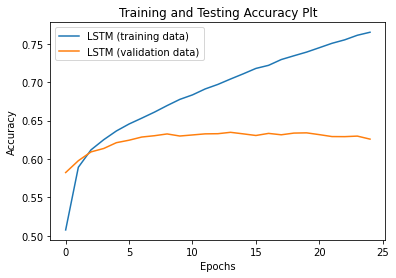

In [25]:
plt.plot(history.history['accuracy'], label='LSTM (training data)')
plt.plot(history.history['val_accuracy'], label='LSTM (validation data)')
plt.title("Training and Testing Accuracy Plt")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc="upper left")
plt.show()